# Section A. Model Complexity and Model Selection

In this section, you study the effect of model complexity on the training and testing error. You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity. <br>

**Background**. A KNN regressor is similar to a KNN classifier (covered in activity1.1) in that it finds the K nearest neighbors and estimates the value of the giventest point based on the values of its neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that hasthe majority vote in the neighborhood, whilst KNN regressor returns the averageof the neighbors’ values. In Activity 1 of Module 1, we use the number of misclassificationsas the measurement of training and testing errors in KNN classifier. For KNN regressor, you need to choose another error function (e.g., the sum of the squares of the errors) as the measurement of training errors and testing errors.


#### Question 1 [KNN Regressor, 20 Marks]
    I. Implement the KNN regressor function: knn(train.data, train.label, test.data, K=3) which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (K). It should return the regressed values for the test data points. Note that, you need to use a distance function to choose the neighbors. The distance function used to measure the distance between a pair of data points is Manhattan distance function. Hint: You are allowed to use KNN classifier code from Activity 1 of Module1. 
    
#### Importing Libraries    

In [10]:
library(reshape2) # Reshape
library(ggplot2) # Plots
library(corrplot) # Analyse correlations 

#### Create the function
1. Takes as input train_data, train_label, test_data and K.
2. Returns the values for the test_labels.
3. Applies manhattan distance. 
4. Uses function `dist` to compare distance between all samples.

In [11]:
# KNN function
knn <- function(train_data, train_label, test_data, K=3){

    ## count number of train and test samples
    train_len <- nrow(train_data)
    test_len <- nrow(test_data)
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test_data, train_data), method= 'manhattan'))[1:test_len, (test_len+1):(test_len+train_len)]
    
    ## for each sample...
    for (i in 1:test_len){
        
        ### ...find its K nearest neighbours from training sampels...
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ### Calculate Mean 
        test_label[i]<- sum(train_label[nn])/K
    }
    
    ## return 
    return (round(test_label,3))
}

    II. Plot the training and the testing errors versus 1/K for K=1,.., 30 in one plot,using the Task1A_train.csv and Task1A_test.csv datasets provided forthis assignment. Save the plot in your Jupyter Notebook file for Question 1.Report your chosen error function in your Jupyter Notebook file.
    
#### Importing the Dataset

In [12]:
test <- read.csv("data\\Sintetic1A_test.csv")
train <- read.csv("data\\Sintetic1A_train.csv")

#### Split the data 
We will create two dataframes **(train_data, test_data)** and  two vectors **(train_label, test_label)**.

In [13]:
# Create a column for index in the dataframes for support
row.names(train) <- 1:nrow(train)
row.names(test) <- 1:nrow(test)

# Create a column for index in the dataframes for support
train_data <- train[1]
train_label <- train[,2]
test_data <- test[1]
test_label <- test[,2]


#### Calculate the train and test missclassification rates for K=1,.., 30

In [14]:
df_error <- data.frame('K'=1:30, 'train'=rep(0,30), 'test'=rep(0,30)) #support table with errors rates
for (k in 1:30){
    df_error[k,'train'] <- sum((knn(train_data, train_label, train_data, K=k) - train_label)^2)/nrow(train_data) # train error
    df_error[k,'test'] <-  sum((knn(train_data, train_label, test_data, K=k)  - test_label)^2)/nrow(test_data) # test error
}

#### Plot the training and the testing errors versus 1/K for K=1,.., 30

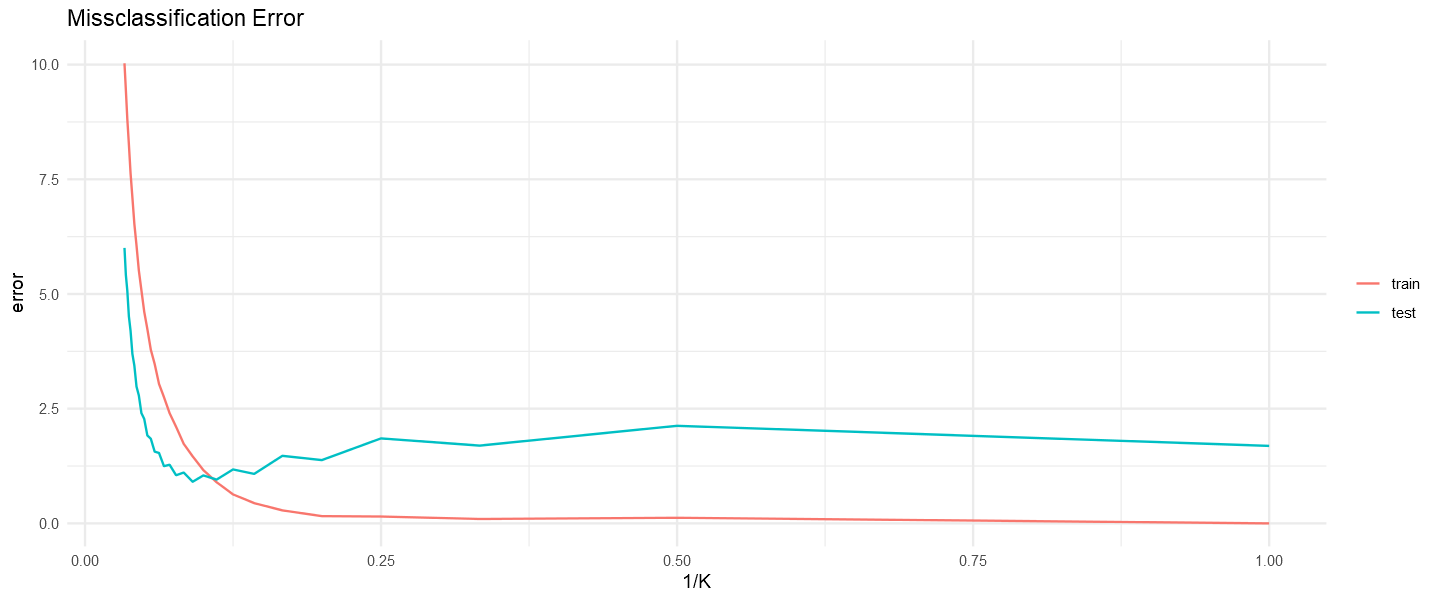

In [15]:
options(repr.plot.width=12, repr.plot.height=5) # area of display

# plot misclassification percentage for train and test data sets
df_error.m <- melt(df_error, id='K') # reshape for visualization
names(df_error.m) <- c('K', 'type', 'error')
ggplot(data=df_error.m, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Missclassification Error")

#### Find optimal K

In [16]:
min.error <- min(df_error.m[df_error.m$type == "test","error"])
min.K <- df_error.m[df_error.m$type == "test" & df_error.m$error == min.error,"K"]
min.K

[1] 11

    III. Report (in your Jupyter Notebook file) the optimum value for K in terms of the testing error. Discuss the values of K and model complexity corresponding to underfitting and overfitting based on your plot in the previous part (Part II).

**After processing the data with our KNN Regressor from K = 1 to K = 30 and stored our trainning and testing errors, we have found a optimal parameter of `K = 11` in terms of testing error. It means that when we group our data in clusters of 11 points our model finds it best performance on the testing dataset. With the support of the plot, we may observe the behaviour trend of our regressor, with the variation of K. The KNN regressor has a tendency for clear overfitting when K becomes to small and underfitting when K becomes too big. This can be understood as consequence of the architecture of the model. When K is is close to 1, there is overfitting and a big complexity. This is associated with the fact that the point (labels) needs to be compared individualy to all other points (from the trainning set). On the other hand, when K = 30, there is much less calculations that needs to be done, because we have big clusters that are aggregating the data.**